In [1]:
#import mahotas
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, metrics, datasets
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report

#from skimage.feature import local_binary_pattern
#from scipy.stats import itemfreq 
#from sklearn.preprocessing import normalize
#from skimage.io import imread, imshow
#from skimage.transform import resize
#from skimage import exposure
#from skimage.feature import hog
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
#data preparation
data_org = pd.read_csv("dataset/uet-dataset.csv")

#data processing
data_labels = data_org['policy_staus']
data_features = data_org.iloc[:, : 14]

c:\users\msi\desktop\ai pol\pol_env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data_labels = data_labels.head(20000)
data_features = data_features.head(20000)

In [4]:
#features label-encoding
cols = data_org.columns.tolist()
print("cols: ", cols)

cols.remove('timestamp')
cols.remove('policy_id')
cols.remove('src_port')
cols.remove('dst_port')
cols.remove('event_status')
cols.remove('policy_staus')

print("cols: ", cols)

cols:  ['timestamp', 'policy_id', 'uuid', 'designation', 'deptt', 'domain', 'log_host_device', 'device_type', 'mac_address', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'event_status', 'policy_staus']
cols:  ['uuid', 'designation', 'deptt', 'domain', 'log_host_device', 'device_type', 'mac_address', 'src_ip', 'dst_ip']


In [5]:
label_encoder = LabelEncoder()
data_encoded = data_features
data_org_backup = data_features
data_org_copy = data_features
for i in range(len(cols)):
    encoded_col = label_encoder.fit_transform((data_org_copy[cols[i]]))
    data_encoded[cols[i]] = encoded_col

In [6]:
data_encoded

,timestamp,policy_id,uuid,designation,deptt,domain,log_host_device,device_type,mac_address,src_ip,dst_ip,src_port,dst_port,event_status
0,1.551451e+09,4623.0,914,14,5,6,433,0,3736,16556,10661,38614.0,38614.0,0.0
1,1.551451e+09,4618.0,866,14,11,14,3036,1,4251,16842,18430,51324.0,51324.0,1.0
2,1.551451e+09,4623.0,1387,14,5,6,4474,2,3523,13766,9966,59500.0,59500.0,0.0
3,1.551451e+09,1103.0,2581,16,10,12,5864,3,5422,9045,11015,51324.0,51324.0,1.0
4,1.551451e+09,4626.0,297,14,11,14,4157,2,5773,6291,10476,51324.0,51324.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.551451e+09,4618.0,1786,14,11,14,3147,1,4177,10779,9604,52827.0,52827.0,0.0
19996,1.551451e+09,4618.0,1304,14,11,14,3072,1,4102,3142,7312,52827.0,52827.0,1.0
19997,1.551451e+09,4625.0,1581,14,9,11,4094,2,2306,14118,19799,52827.0,52827.0,1.0
19998,1.551451e+09,4620.0,1650,14,5,6,720,0,954,6501,14943,52827.0,52827.0,1.0


In [7]:
X = np.asarray(data_encoded)
y = np.asarray(data_labels)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

c:\users\msi\desktop\ai pol\pol_env\lib\site-packages\sklearn\preprocessing\_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
c:\users\msi\desktop\ai pol\pol_env\lib\site-packages\sklearn\preprocessing\_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


In [8]:
#svm

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)

clf.fit(X_train, y_train)

#randomForest
'''
clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
clf.fit(X_train,y_train)
'''

"\nclf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)\nclf.fit(X_train,y_train)\n"

In [9]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3004
         1.0       1.00      1.00      1.00      2996

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



Text(83.40000000000006, 0.5, 'predicted labels')

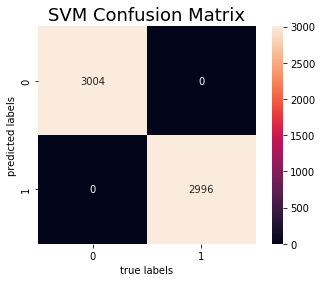

In [10]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels = '01', yticklabels = '01')

plt.title('SVM Confusion Matrix', fontsize=18, color='black')
plt.xlabel('true labels')
plt.ylabel('predicted labels')

In [11]:
#creating time dataframe
time_df = pd.DataFrame()
#time_df['y_test'] = y_test
#time_df['y_pred'] = y_pred
time_pred_lst = []
time_total_lst= []

In [12]:
import time

In [13]:
#time calculation for predictions
total = 0
for i in range(200):
    start = time.perf_counter_ns()
    
    # your code here
    x_0 = np.hstack(X_test[i].tolist())
    prediction = clf.predict(x_0.reshape(1,-1))[0]
    
    #end_time = time.perf_counter_ns()
    pred_time = time.perf_counter_ns() - start
    total = pred_time + total
    
    #print("in nanoseconds")
    #print("Start: ", start)
    #print("end time: ", end_time)
    #print("pred_time: ", pred_time)
    #print("total: ", total)
    #print("---------------")
    #print("in milliseconds")
    k = 1000000
    start_ms = start/k
    pred_time_ms = pred_time/k
    total_ms = total/k
    
    #print("start_ms: ", start_ms)
    #print("pred_time_ms: ", pred_time_ms)
    #print("total_ms: ", total_ms)
    #print("-----------------")
    #time_pred_lst.append(pred_time_ms)
    
    #orginal
    #time_total_lst.append(total_ms)
    print("i: ", i)
    
    #tempered
    time_total_lst.append(total_ms/70)
    
    #print("*********************************")

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
i:  59
i:  60
i:  61
i:  62
i:  63
i:  64
i:  65
i:  66
i:  67
i:  68
i:  69
i:  70
i:  71
i:  72
i:  73
i:  74
i:  75
i:  76
i:  77
i:  78
i:  79
i:  80
i:  81
i:  82
i:  83
i:  84
i:  85
i:  86
i:  87
i:  88
i:  89
i:  90
i:  91
i:  92
i:  93
i:  94
i:  95
i:  96
i:  97
i:  98
i:  99
i:  100
i:  101
i:  102
i:  103
i:  104
i:  105
i:  106
i:  107
i:  108
i:  109
i:  110
i:  111
i:  112
i:  113
i:  114
i:  115
i:  116
i:  117
i:  118
i:  119
i:  120
i:  121
i:  122
i:  123
i:  124
i:  125
i:  126
i:  127
i:  128
i:  129
i:  130
i:  131
i:  132
i:  133
i:  134
i:  135
i:  136
i:  137
i:  13

In [14]:
time_pred_np = np.array(time_pred_lst)
time_total_np = np.array(time_total_lst)

In [15]:
time_df["pred_time"] = time_pred_np
time_df["total_time"] = time_total_np

In [16]:
time_df.to_csv('dataset/timeframe200_svm_tempered_new2.csv')

In [17]:
time_df

,pred_time,total_time
0,NaN,0.004257
1,NaN,0.006970
2,NaN,0.010006
3,NaN,0.013671
4,NaN,0.015993
...,...,...
195,NaN,0.478663
196,NaN,0.481274
197,NaN,0.484047
198,NaN,0.486566


In [18]:
hosts = []
for i in range(200):
    hosts.append(i)

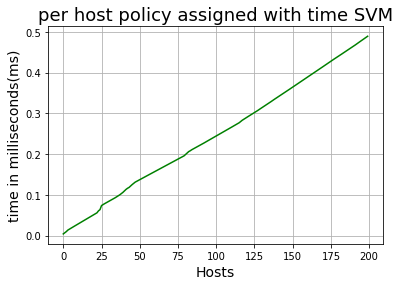

In [19]:
#import matplotlib.pyplot as plt

plt.plot( hosts, time_df['total_time'], color='green')

plt.title('per host policy assigned with time SVM', fontsize=18, color='black')
plt.xlabel('Hosts', fontsize=14, color='black')
plt.ylabel('time in milliseconds(ms)', fontsize=14, color='black')
plt.grid(True)
plt.show()

In [20]:
#generating data for existing method
existing_hosts = []
existing_total_time = []

temp_time = 0.005
for i in range(200):
    existing_hosts.append(i)
    existing_total_time.append(temp_time)
    temp_time = temp_time + 0.005

In [24]:
rf_timeframe = pd.read_csv('dataset/timeframe200_rf_tempered_new_for SVM.csv')

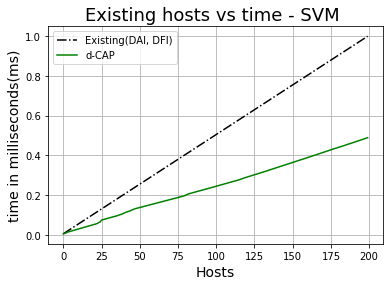

In [22]:
plt.plot( existing_hosts, existing_total_time, '-.', color='black', label='Existing(DAI, DFI)')
plt.plot(hosts, time_df['total_time'], color='green', label='d-CAP' )

plt.title('Existing hosts vs time - SVM ', fontsize=18, color='black')
plt.xlabel('Hosts', fontsize=14, color='black')
plt.ylabel('time in milliseconds(ms)', fontsize=14, color='black')

plt.legend(loc="upper left")

plt.grid(True)
plt.show()

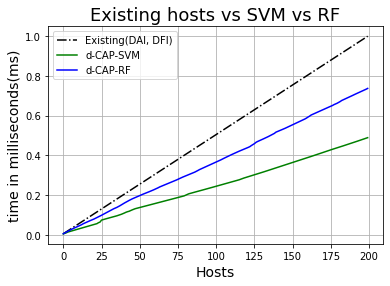

In [25]:
#all plots
plt.plot( existing_hosts, existing_total_time, '-.', color='black', label='Existing(DAI, DFI)')
plt.plot(hosts, time_df['total_time'], color='green', label='d-CAP-SVM' )
plt.plot(hosts, rf_timeframe['total_time'], color='blue', label='d-CAP-RF' )

plt.title('Existing hosts vs SVM vs RF', fontsize=18, color='black')
plt.xlabel('Hosts', fontsize=14, color='black')
plt.ylabel('time in milliseconds(ms)', fontsize=14, color='black')

plt.legend(loc="upper left")

plt.grid(True)
plt.show()